<a href="https://colab.research.google.com/github/chorltonm/fa-cup-upsets/blob/main/descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import Libaries
import os
import json
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import drive
from google.colab import userdata

from matplotlib import pyplot

In [10]:
# Mount Google Drive
drive.mount('/content/drive')

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/output_files')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Authentication credentials and keys

# Google Service Account

# Load the JSON key from local Google Collab file
key = json.load(open('/content/drive/MyDrive/service_account.json', 'r'))

# Authenticate using the loaded key
credentials = service_account.Credentials.from_service_account_info(key)

# Set up the BigQuery client with the credentials to project
client = bigquery.Client(credentials=credentials, project='birkbeck-msc-project-422917')

In [4]:
# Feature Data

fa_cup_raw_features = """
    select * from preparation_layer.view_fa_cup_round_3_features
"""

fa_cup_raw_features_df = client.query(fa_cup_raw_features).to_dataframe()
display(fa_cup_raw_features_df)


,arena_stadium_capacity,home_team_round_3_position,home_lineup_strength,home_team_league_form,home_team_league_form_home_and_away,home_team_league_promotion_relegation,away_team_round_3_position,away_lineup_strength,away_team_league_form,away_team_league_form_home_and_away,...,match_weather_data_hours_precip,match_weather_data_hours_snow,match_weather_data_hours_snowdepth,match_weather_data_hours_windspeed,match_weather_data_hours_pressure,match_weather_data_hours_visibility,match_weather_data_hours_cloudcover,match_1st_half_weather_data_hours_conditions,match_2nd_half_weather_data_hours_conditions,target_variable
0,29673,30,NaN,0.00,0.39,0,55,NaN,0.00,0.28,...,0.000,0.0,0.19,17.15,1008.95,9.90,1.25,Clear,Clear,0
1,6500,58,NaN,0.00,0.56,1,37,NaN,0.28,0.22,...,0.000,NaN,NaN,21.80,NaN,NaN,NaN,Overcast,Clear,1
2,27000,32,NaN,0.33,0.39,0,12,NaN,0.00,0.06,...,0.000,0.0,0.00,6.35,1011.20,11.70,45.60,Partially cloudy,Partially cloudy,0
3,5140,62,NaN,0.00,0.28,1,38,NaN,0.39,0.22,...,0.000,0.0,0.00,3.75,1028.40,12.45,3.95,Clear,Clear,0
4,32384,43,NaN,0.17,0.06,1,2,NaN,0.83,0.72,...,0.000,NaN,NaN,13.60,1019.45,7.75,90.00,Partially cloudy,Partially cloudy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,30089,29,0.68,0.39,0.33,0,4,0.80,0.00,0.44,...,0.000,0.0,0.34,4.20,1020.35,5.55,92.80,Partially cloudy,Overcast,0
301,17338,47,0.80,0.00,0.28,0,19,0.76,0.17,0.11,...,0.000,0.0,0.00,3.00,1028.10,13.90,18.80,Clear,Clear,1
302,53400,2,0.70,0.72,0.83,1,41,0.80,0.00,0.06,...,0.011,0.0,0.00,12.00,1015.05,6.55,63.45,"Rain, Partially cloudy",Partially cloudy,0
303,4502,62,0.86,0.22,0.33,0,36,0.82,0.00,0.28,...,0.000,0.0,0.00,2.30,1026.70,3.30,59.40,Partially cloudy,Partially cloudy,0


In [5]:
fa_cup_raw_features_df.describe(include="all")

,arena_stadium_capacity,home_team_round_3_position,home_lineup_strength,home_team_league_form,home_team_league_form_home_and_away,home_team_league_promotion_relegation,away_team_round_3_position,away_lineup_strength,away_team_league_form,away_team_league_form_home_and_away,...,match_weather_data_hours_precip,match_weather_data_hours_snow,match_weather_data_hours_snowdepth,match_weather_data_hours_windspeed,match_weather_data_hours_pressure,match_weather_data_hours_visibility,match_weather_data_hours_cloudcover,match_1st_half_weather_data_hours_conditions,match_2nd_half_weather_data_hours_conditions,target_variable
count,291.0,305.0,205.000000,300.000000,300.000000,305.0,305.0,200.00000,300.00000,300.000000,...,278.000000,215.000000,228.000000,278.000000,269.000000,273.000000,277.000000,278,278,305.0
unique,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5,<NA>
top,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partially cloudy,Partially cloudy,<NA>
freq,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,160,<NA>
mean,27513.398625,32.954098,0.783366,0.229467,0.404767,0.567213,35.986885,0.76885,0.21810,0.383567,...,0.000155,0.000279,0.174759,9.789568,1017.691264,11.601648,64.465884,NaN,NaN,0.268852
std,16635.547215,19.810895,0.097979,0.272326,0.176859,0.496276,18.014244,0.09555,0.25503,0.175586,...,0.000922,0.002542,0.789563,5.222300,15.108949,6.203286,30.018365,NaN,NaN,0.444092
min,2150.0,1.0,0.150000,0.000000,0.060000,0.0,1.0,0.20000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.400000,982.050000,0.550000,0.000000,NaN,NaN,0.0
25%,12763.0,14.0,0.760000,0.000000,0.280000,0.0,21.0,0.74000,0.00000,0.265000,...,0.000000,0.000000,0.000000,5.712500,1007.000000,6.700000,43.750000,NaN,NaN,0.0
50%,25700.0,33.0,0.800000,0.000000,0.390000,1.0,37.0,0.78000,0.00000,0.390000,...,0.000000,0.000000,0.000000,9.100000,1020.350000,9.900000,72.200000,NaN,NaN,0.0
75%,34292.5,51.0,0.840000,0.500000,0.560000,1.0,52.0,0.82000,0.44000,0.500000,...,0.000000,0.000000,0.000000,12.387500,1030.650000,16.000000,90.100000,NaN,NaN,1.0


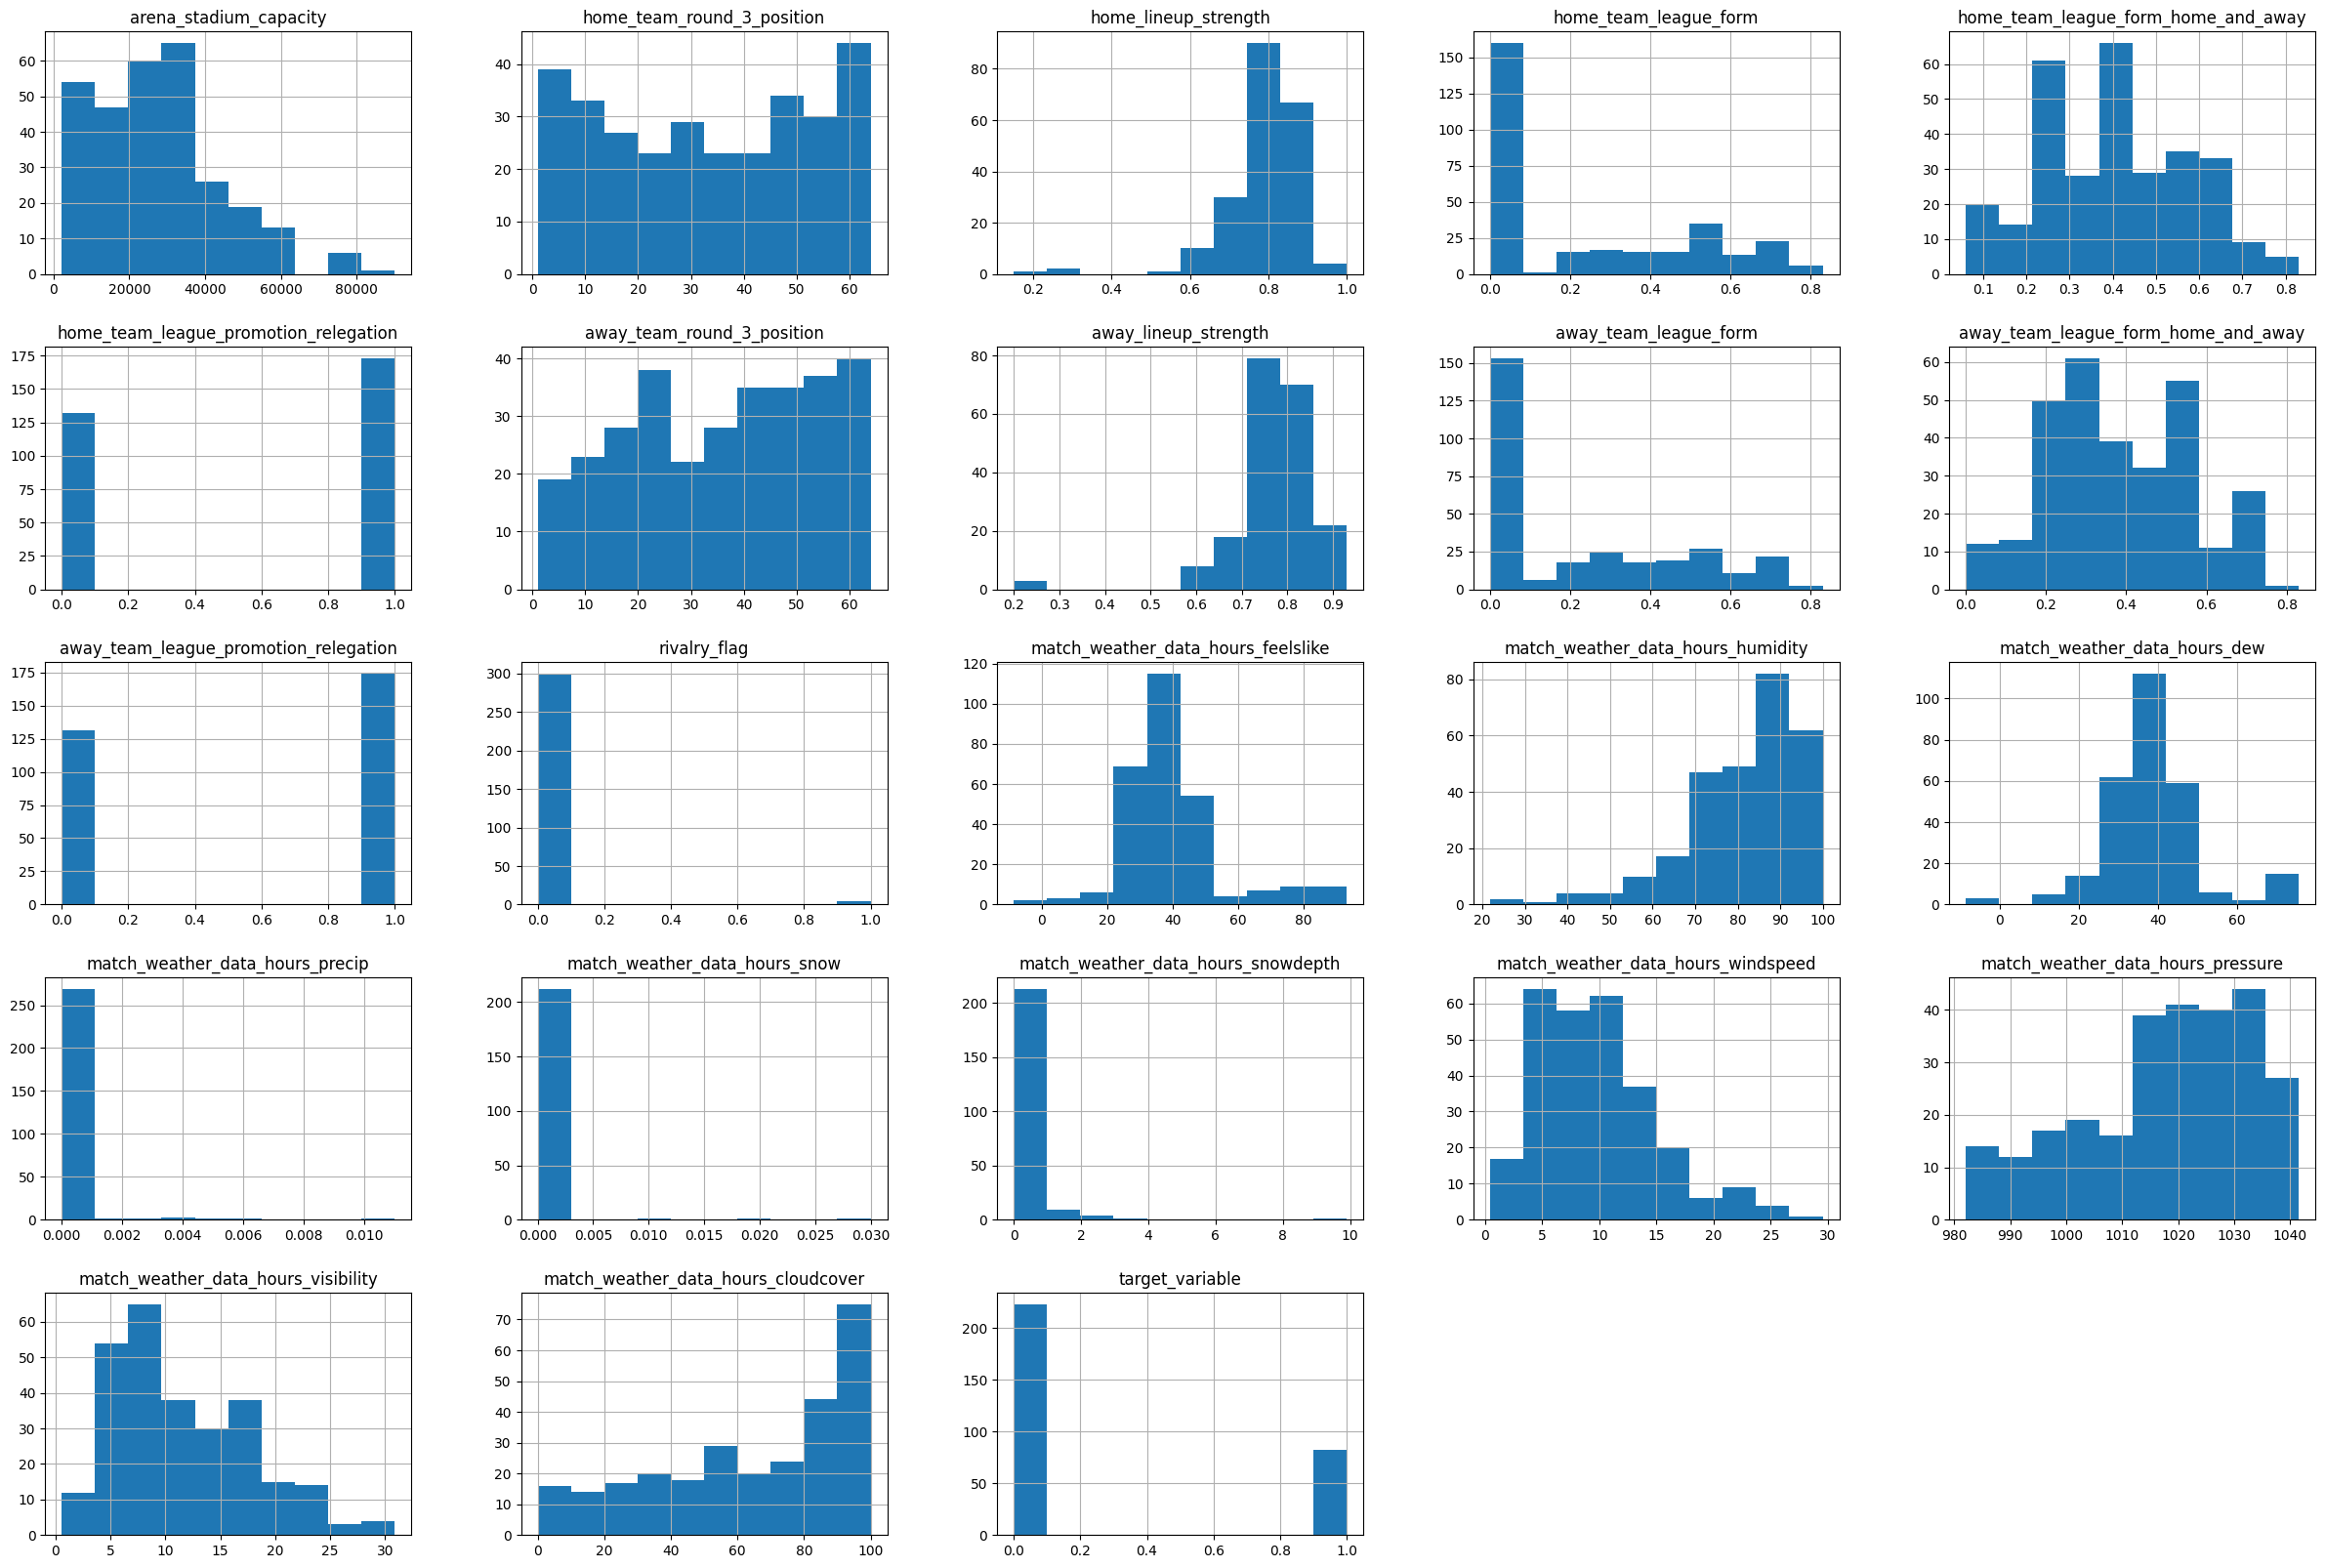

In [6]:
# Histograms

fa_cup_raw_features_df.hist(bins=10, figsize=(30,20))
pyplot.show()



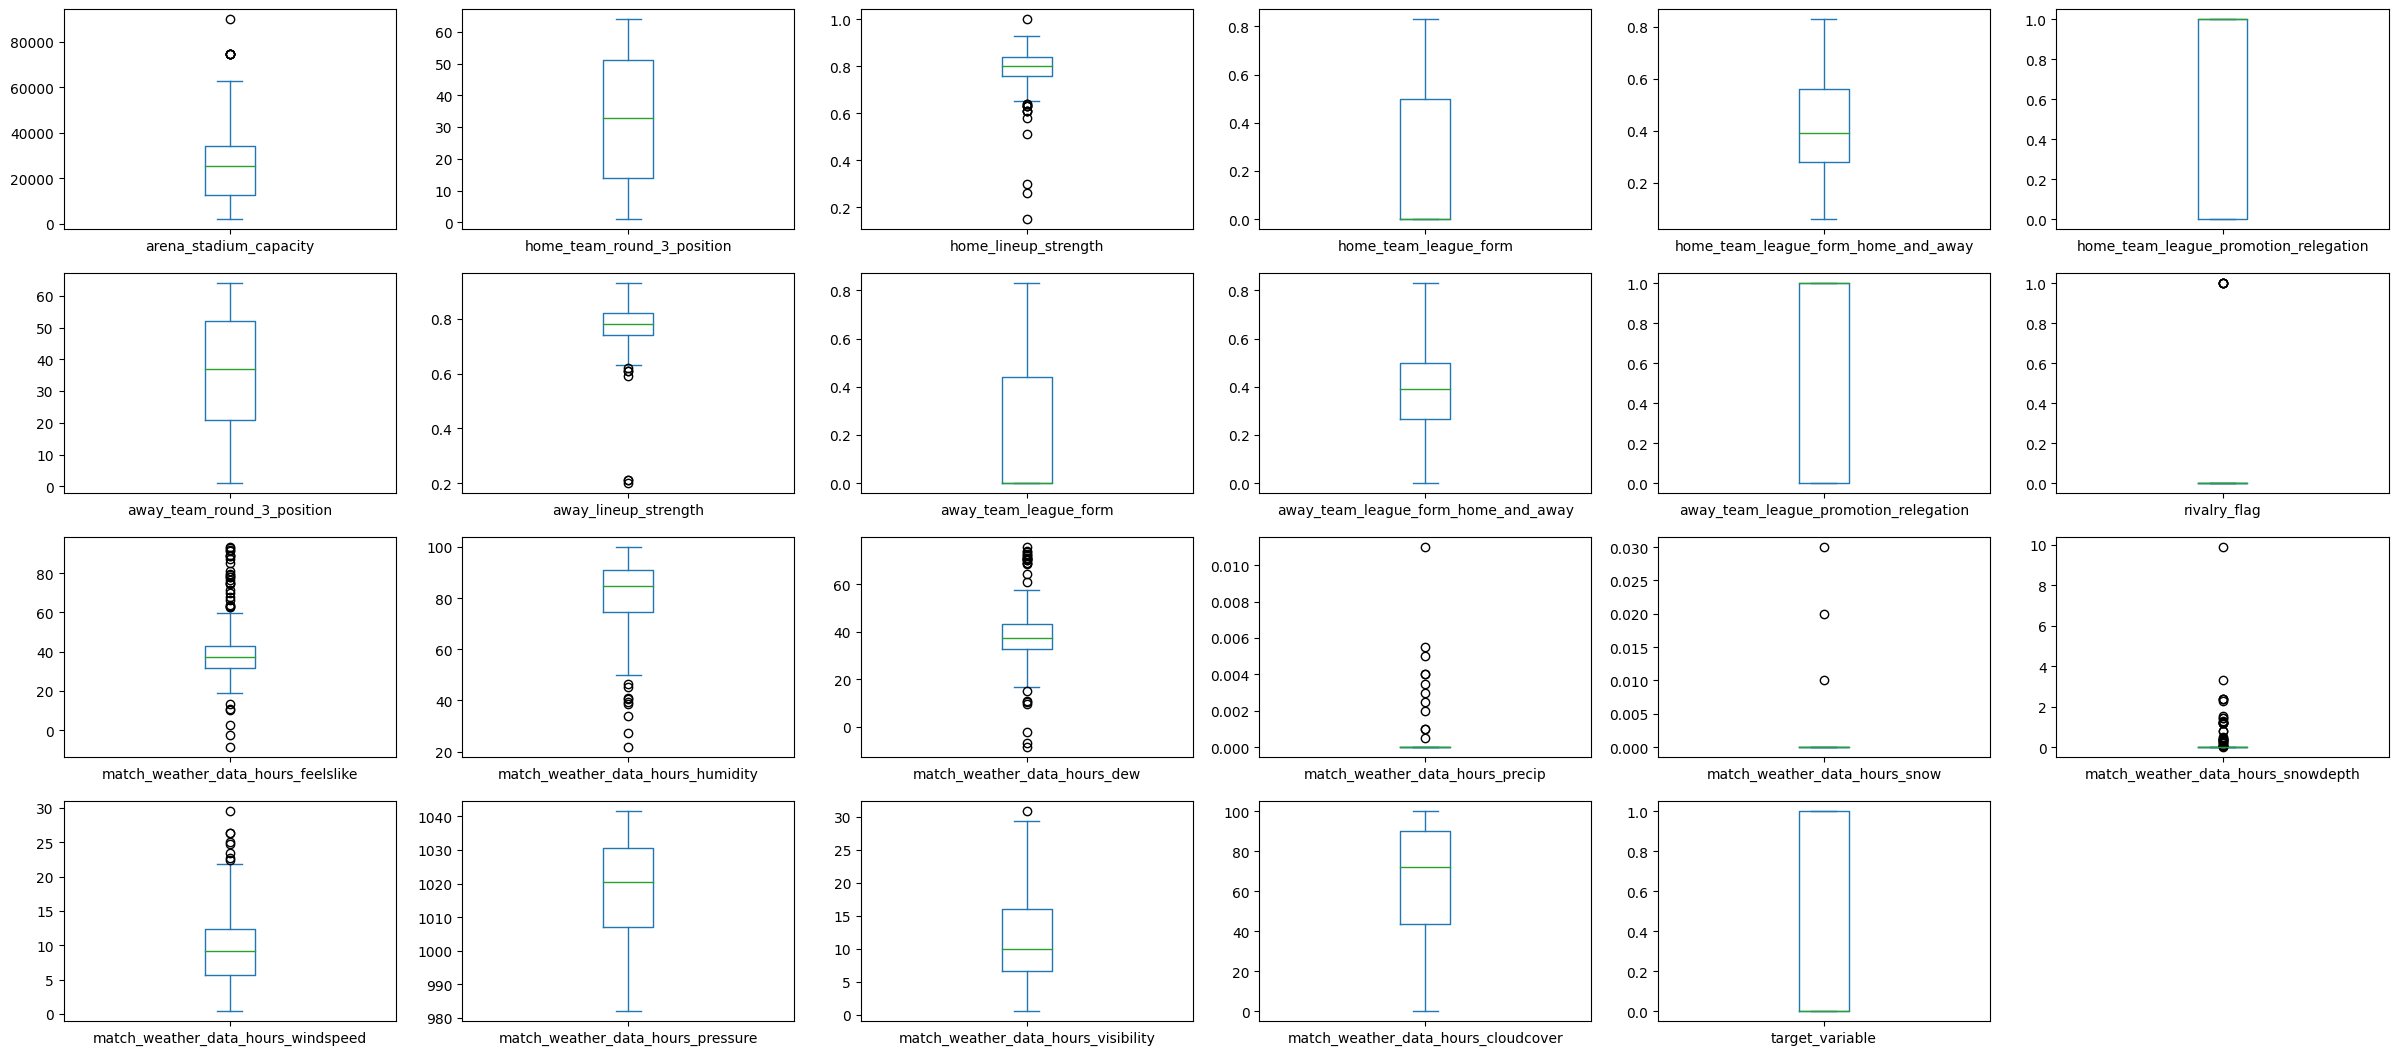

In [7]:

fa_cup_raw_features_df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(30,20))
pyplot.show()